-------- > epoch 1:  erreur quadratique moyenne 0.5566766193115422
-------- > epoch 2:  erreur quadratique moyenne 0.5464872067274764
-------- > epoch 3:  erreur quadratique moyenne 0.5393182252201105
-------- > epoch 4:  erreur quadratique moyenne 0.5332353566289368
-------- > epoch 5:  erreur quadratique moyenne 0.5272542747264845
-------- > epoch 6:  erreur quadratique moyenne 0.520869234961483
-------- > epoch 7:  erreur quadratique moyenne 0.5137959167844934
-------- > epoch 8:  erreur quadratique moyenne 0.5058478278139495
-------- > epoch 9:  erreur quadratique moyenne 0.4968812419543138
-------- > epoch 10:  erreur quadratique moyenne 0.48677330069889374
-------- > epoch 11:  erreur quadratique moyenne 0.47541652035521187
-------- > epoch 12:  erreur quadratique moyenne 0.46272223997821466
-------- > epoch 13:  erreur quadratique moyenne 0.4486295696894828
-------- > epoch 14:  erreur quadratique moyenne 0.4331176844326081
-------- > epoch 15:  erreur quadratique moyenne 0.4162

-------- > epoch 292:  erreur quadratique moyenne 0.0027207620660847135
-------- > epoch 293:  erreur quadratique moyenne 0.0027090767854710844
-------- > epoch 294:  erreur quadratique moyenne 0.002697487156504634
-------- > epoch 295:  erreur quadratique moyenne 0.0026859920346481263
-------- > epoch 296:  erreur quadratique moyenne 0.0026745902933040027
-------- > epoch 297:  erreur quadratique moyenne 0.0026632808234677034
-------- > epoch 298:  erreur quadratique moyenne 0.0026520625333889404
-------- > epoch 299:  erreur quadratique moyenne 0.0026409343482406127
-------- > epoch 300:  erreur quadratique moyenne 0.00262989520979538
-------- > epoch 301:  erreur quadratique moyenne 0.002618944076109503
-------- > epoch 302:  erreur quadratique moyenne 0.002608079921213809
-------- > epoch 303:  erreur quadratique moyenne 0.002597301734811688
-------- > epoch 304:  erreur quadratique moyenne 0.002586608521983817
-------- > epoch 305:  erreur quadratique moyenne 0.0025759993028994805

-------- > epoch 579:  erreur quadratique moyenne 0.0011917391250763814
-------- > epoch 580:  erreur quadratique moyenne 0.0011893520717358428
-------- > epoch 581:  erreur quadratique moyenne 0.0011869742695902108
-------- > epoch 582:  erreur quadratique moyenne 0.001184605665765173
-------- > epoch 583:  erreur quadratique moyenne 0.0011822462077848493
-------- > epoch 584:  erreur quadratique moyenne 0.0011798958435680618
-------- > epoch 585:  erreur quadratique moyenne 0.0011775545214246473
-------- > epoch 586:  erreur quadratique moyenne 0.0011752221900518342
-------- > epoch 587:  erreur quadratique moyenne 0.0011728987985306287
-------- > epoch 588:  erreur quadratique moyenne 0.0011705842963222642
-------- > epoch 589:  erreur quadratique moyenne 0.0011682786332646803
-------- > epoch 590:  erreur quadratique moyenne 0.0011659817595690513
-------- > epoch 591:  erreur quadratique moyenne 0.0011636936258163158
-------- > epoch 592:  erreur quadratique moyenne 0.0011614141829

-------- > epoch 842:  erreur quadratique moyenne 0.0007764428228273973
-------- > epoch 843:  erreur quadratique moyenne 0.000775404094767343
-------- > epoch 844:  erreur quadratique moyenne 0.0007743680707005429
-------- > epoch 845:  erreur quadratique moyenne 0.0007733347402135164
-------- > epoch 846:  erreur quadratique moyenne 0.0007723040929457642
-------- > epoch 847:  erreur quadratique moyenne 0.0007712761185894516
-------- > epoch 848:  erreur quadratique moyenne 0.0007702508068890665
-------- > epoch 849:  erreur quadratique moyenne 0.0007692281476410982
-------- > epoch 850:  erreur quadratique moyenne 0.0007682081306936879
-------- > epoch 851:  erreur quadratique moyenne 0.0007671907459463483
-------- > epoch 852:  erreur quadratique moyenne 0.0007661759833495837
-------- > epoch 853:  erreur quadratique moyenne 0.0007651638329046204
-------- > epoch 854:  erreur quadratique moyenne 0.0007641542846630523
-------- > epoch 855:  erreur quadratique moyenne 0.0007631473287

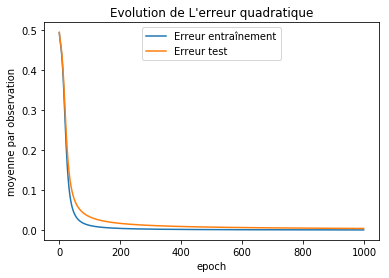

In [8]:
%matplotlib inline
# -*- coding: utf-8 -*-
# Implémentation d'un RNA par couche
# Deux types de couches : dense linéaire et activation
# Division des données en deux groupes : entrainement et test

# Exemple avec 4 observations

import numpy as np
np.random.seed(0) # pour reproduire les mêmes résultats
import matplotlib.pyplot as plt
import random
random.seed(0)

class Couche:
    """ Classe abstraite qui représente une couche du RNA
        X: vecteur, entrée de la couche 
        Y: vecteur, sortie de la couche
    """
    def __init__(self):
        self.X = None
        self.Y = None

    def propager_une_couche(self,X):
        """ Calculer la sortie Y pour une valeur de X
        
        X : vecteur des variables prédictives
        Les valeurs de X et Y sont stockées pour les autres traitements.
        """
        raise NotImplementedError

    def retropropager_une_couche(self,dJ_dY,taux,trace=False):
        """ Calculer les dérivées par rapport à X et les autres paramètres à partir de dJ_dY
        et mettre à jour les paramètres de la couche selon le taux spécifié.
        
        dJ_dY : np.array(1,2), dérivées de J par rapport à la sortie Y
        taux : float, le taux dans la descente de gradiant
        retourne la dérivée de J par rapport à X
        """
        raise NotImplementedError

class CoucheDenseLineaire(Couche):
    """ Couche linéaire dense. Y=WX+B
    """
    def __init__(self,n,m,init_W=None,init_B=None):
        """ Initilalise les paramètres de la couche. W et B sont initialisés avec init_W et init_B lorsque spécifiés.
        Sinon, des valeurs aléatoires sont générés pour W une distribution normale N(0,1) et B est initialisée avec des 0 
        si les paramètres init_W et init_B ne sont pas spécifiés.
        n : int, taille du vecteur d'entrée X
        m : int, taille du vecteur de sortie Y
        init_W : np.array, shape(n,m), valeur initiale optionnelle de W
        init_B : np.array, shape(1,m), valeur initial optionnelle de B
        """
        if init_W is None :
            self.W = np.random.randn(n,m) 
        else:
            self.W = init_W
        if init_B is None :
            self.B = np.zeros((1,m))
        else:
            self.B = init_B

    def propager_une_couche(self,X):
        """ Fait la propagation de X et retourne Y=WX+B. 
        """
        self.X = X
        self.Y = self.B + np.dot(self.X,self.W)
        return self.Y

    def retropropager_une_couche(self,dJ_dY,taux,trace=False):
        """ Calculer les dérivées dJ_dW,dJ_dB,dJ_dX pour une couche dense linéaire et
        mettre à jour les paramètres selon le taux spécifié
        
        dJ_dY : np.array(1,2), dérivées de J par rapport à la sortie Y
        taux : float, le taux dans la descente de gradiant
        retourne la dérivée de J par rapport à X
        """
        dJ_dW = np.dot(self.X.T,dJ_dY)
        dJ_dB = dJ_dY
        dJ_dX = np.dot(dJ_dY,self.W.T)
        if trace:
            print("dJ_dW:",dJ_dW)
            print("dJ_dB:",dJ_dB)
            print("dJ_dX:",dJ_dX)
        # Metre à jour les paramètres W et B
        self.W -= taux * dJ_dW
        self.B -= taux * dJ_dB
        if trace:
            print("W modifié:",self.W)
            print("B modifié:",self.B)
        return dJ_dX

    
class CoucheActivation(Couche):
    """ Couche d'activation selon une fonction spécifiée dans le constructeur
    """
    def __init__(self,fonction_activation,derivee):
        """ Initialise la fonction_activation ainsi que la dérivée
        fonction_activation: une fonction qui prend chacune des valeurs de X et 
        retourne Y=fonction_activation(X)
        derivee: une fonction qui calcule la dérivée la fonction_activation
        """
        self.fonction_activation = fonction_activation
        self.derivee = derivee

    def propager_une_couche(self,X):
        """ Retourne Y=fonction_activation(X)
        """
        self.X = X
        self.Y = self.fonction_activation(self.X)
        return self.Y

    def retropropager_une_couche(self,dJ_dY,taux,trace=False):
        """ Retourne la dérivée de la fonction d'activation par rapport l'entrée X
        Le taux n'est pas utilisé parce qu'il n'y a pas de paramètres à modifier dans ce genre de couche
        """
        return self.derivee(self.X) * dJ_dY

def erreur_quadratique(y_prediction,y):
    """ Retourne l'erreur quadratique entre la prédiction y_prediction et la valeur attendue y
    """ 
    return np.sum(np.power(y_prediction-y,2))


def d_erreur_quadratique(y_prediction,y):
    return 2*(y_prediction-y)

class ReseauMultiCouches:
    """ Réseau mutli-couche formé par une séquence de Couches
    
    couches : liste de Couches du RNA
    cout : fonction qui calcule de cout J
    derivee_cout: dérivée de la fonction de cout
    """
    def __init__(self):
        self.couches = []
        self.cout = None
        self.derivee_cout = None

    def ajouter_couche(self,couche):
        self.couches.append(couche)

    def specifier_J(self,cout,derivee_cout):
        """ Spécifier la fonction de coût J et sa dérivée
        """
        self.cout = cout
        self.derivee_cout = derivee_cout

    def propagation_donnees_X(self,donnees_X,trace=False):
        """ Prédire Y pour chacune des observations dans donnees_X)
        donnees_X : np.array 3D des valeurs de X pour chacune des observations
            chacun des X est un np.array 2D de taille (1,n)
        """
        nb_observations = len(donnees_X)
        predictions_Y = []
        for indice_observation in range(nb_observations):
            # XY_propage : contient la valeur de X de la couche courante qui correspond 
            # à la valeur de Y de la couche précédente
            XY_propage = donnees_X[indice_observation]
            if trace: 
                print("Valeur de X initiale:",XY_propage)
            for couche in self.couches:
                XY_propage = couche.propager_une_couche(XY_propage)
                if trace: 
                    print("Valeur de Y après propagation pour la couche:",XY_propage)
            predictions_Y.append(XY_propage)

        return predictions_Y

    def calculer_cout_moyen(self,donnees_X,donnees_Y):
        """ Retourne le cout moyen pour un ensemble d'observations"""
        predictions_Y=self.propagation_donnees_X(donnees_X)
        total = np.sum([self.cout(predictions_Y[indice],donnees_Y[indice]) for indice in range(len(donnees_Y))])
        return total/len(donnees_X)

    def entrainer_descente_gradiant_stochastique(self,donnees_ent_X,donnees_ent_Y,donnees_test_X,donnees_test_Y,
                                                 nb_epochs,taux,trace=False,graph_cout=False):
        """ Entrainer le réseau par descente de gradiant stochastique (une observation à la fois)
        
        donnees_ent_X : np.array 3D des valeurs de X pour chacune des observations d'entrainement
            chacun des X est un np.array 2D de taille (1,n)
        donnees_ent_Y : np.array 3D des valeurs de Y pour chacune des observations d'entrainement
            chacun des Y est un np.array 2D de taille (1,m)
        donnees_test_X : np.array 3D des valeurs de X pour chacune des observations de test
            chacun des X est un np.array 2D de taille (1,n)
        donnees_test_Y : np.array 3D des valeurs de Y pour chacune des observations de test
            chacun des Y est un np.array 2D de taille (1,m)
        nb_epochs : nombre de cycle de passage sur les données d'entainement
        taux : taux dans la descente de gradiant
        trace : Boolean, True pour afficher une trace des calculs effectués sur les paramètres
        graph_cout : Boolean, True pur afficher un graphique de l'évolution du coût
        """
        nb_observations = len(donnees_ent_X)
        if graph_cout :
            liste_cout_moyen = []
            liste_cout_moyen_test = []

        # Boucle d'entrainement principale, nb_epochs fois
        for cycle in range(nb_epochs):
            cout_total = 0
            # Descente de gradiant stochastique, une observation à la fois
            for indice_observation in range(nb_observations):
                # Propagation avant pour une observation X
                # XY_propage : contient la valeur de X de la couche courante qui correspond 
                # à la valeur de Y de la couche précédente
                XY_propage = donnees_ent_X[indice_observation]
                if trace: 
                    print("Valeur de X initiale:",XY_propage)

                for couche in self.couches:
                    XY_propage = couche.propager_une_couche(XY_propage)
                    if trace: 
                        print("Valeur de Y après propagation pour la couche:",XY_propage)

                # Calcul du coût pour une observation
                cout_total += self.cout(XY_propage,donnees_ent_Y[indice_observation])

                # Rétropropagation pour une observation
                # dJ_dX_dJ_dY représente la valeur de la dérivée dJ_dX de la couche suivante
                # qui correspond à dJ_dY de la couche en cours de traitement
                dJ_dX_dJ_dY = self.derivee_cout(XY_propage,donnees_ent_Y[indice_observation])
                if trace :
                    print("dJ_dY pour la couche finale:",dJ_dX_dJ_dY)
                for couche in reversed(self.couches):
                    dJ_dX_dJ_dY = couche.retropropager_une_couche(dJ_dX_dJ_dY,taux,trace)

            # Calculer et afficher le coût moyen pour une epoch
            cout_moyen = cout_total/nb_observations
            if graph_cout:
                print(f'-------- > epoch {cycle+1}:  erreur quadratique moyenne {cout_moyen}')
                # liste_cout_moyen.append(cout_moyen)
                liste_cout_moyen.append(self.calculer_cout_moyen(donnees_ent_X,donnees_ent_Y))
                liste_cout_moyen_test.append(self.calculer_cout_moyen(donnees_test_X,donnees_test_Y))
                
            
        # Affichage du graphique d'évolution de l'erreur quadratique
        if graph_cout:
            plt.plot(np.arange(0,nb_epochs),liste_cout_moyen,label='Erreur entraînement')
            plt.plot(np.arange(0,nb_epochs),liste_cout_moyen_test,label='Erreur test')
            plt.title("Evolution de L'erreur quadratique")
            plt.xlabel('epoch')
            plt.ylabel('moyenne par observation')
            plt.legend(loc='upper center')
            plt.show()

def tanh(x):
    return np.tanh(x)

def derivee_tanh(x):
    return 1-np.tanh(x)**2

def sigmoide(x):
    return 1.0/(1.0+np.exp(-x))

def derivee_sigmoide(x):
    return sigmoide(x)*(1-sigmoide(x))

donnees_ent_X = np.array([[[1,1]],[[0,0]],[[0.5,1]],[[0.25,0]]])
donnees_ent_Y = np.array([[[1,0]],[[0,1]],[[1,0]],[[0,1]]])
donnees_test_X = np.array([[[0.9,1.2]],[[0.1,0.2]],[[0.75,1]],[[0.25,0.25]]])
donnees_test_Y = np.array([[[1,0]],[[0,1]],[[1,0]],[[0,1]]])

# Définir les paramètres initiaux de RNA Minus
B1=np.array([[0.2,0.7]])
W1=np.array([[0.5,0.1],[0.3,-0.3]])
B2=np.array([[-0.2,0.5]])
W2=np.array([[0.7,-0.1],[0,0.2]])

# Définir l'architecture du RNA Minus
un_RNA = ReseauMultiCouches()
un_RNA.specifier_J(erreur_quadratique,d_erreur_quadratique)
un_RNA.ajouter_couche(CoucheDenseLineaire(2,2,init_W=W1,init_B=B1))
un_RNA.ajouter_couche(CoucheActivation(sigmoide,derivee_sigmoide))
un_RNA.ajouter_couche(CoucheDenseLineaire(2,2,init_W=W2,init_B=B2))
un_RNA.ajouter_couche(CoucheActivation(sigmoide,derivee_sigmoide))

# Entrainer le RNA Minus
un_RNA.entrainer_descente_gradiant_stochastique(donnees_ent_X,donnees_ent_Y,donnees_test_X,donnees_test_Y,
                                                nb_epochs=1000,taux=0.5,trace = False, graph_cout = True)
